<a href="https://colab.research.google.com/github/JSunOO/AIB09_Discussion/blob/master/section2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
file = 'GeneralEsportData.csv'
df = pd.read_csv(file, encoding='cp949')
df.head()

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99
1,Age of Empires II,1999,Strategy,2280004.90,720999.87,1508,1107
2,Age of Empires III,2005,Strategy,93913.65,41800.00,139,120
3,Age of Empires IV,2021,Strategy,75765.25,217.00,115,56
4,Age of Empires Online,2011,Strategy,5283.56,775.00,22,16


In [202]:
import numpy as np
import seaborn as sns

df['Genre'].value_counts(normalize=True)

Fighting Game                      0.313406
First-Person Shooter               0.208333
Sports                             0.130435
Racing                             0.097826
Strategy                           0.096014
Multiplayer Online Battle Arena    0.041667
Collectible Card Game              0.030797
Puzzle Game                        0.028986
Battle Royale                      0.023551
Third-Person Shooter               0.018116
Role-Playing Game                  0.010870
Name: Genre, dtype: float64

In [203]:
target = 'TotalTournaments'
feature = df.drop(columns=[target]).columns

In [204]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state = 2)

#major = train[target].mode()
#pred = [major] * len(train)

In [205]:
train, val = train_test_split(df, test_size=0.2, random_state=2)
train.shape, val.shape

((441, 7), (111, 7))

In [206]:
def engineer(mk):
  mk['OnlineEarnings'] = mk['OnlineEarnings'].astype(int)
  mk['TotalEarnings'] = mk['TotalEarnings'].astype(int)
  #mk = mk.drop('Game',axis=1)
  #mk = mk.drop('Genre',axis=1)
  return mk

train = engineer(train)
val = engineer(val)
test = engineer(test)

In [207]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [208]:
train.dtypes

Game                object
ReleaseDate          int64
Genre               object
TotalEarnings        int64
OnlineEarnings       int64
TotalPlayers         int64
TotalTournaments     int64
dtype: object

In [209]:
df['Genre'].value_counts(normalize=True)

Fighting Game                      0.313406
First-Person Shooter               0.208333
Sports                             0.130435
Racing                             0.097826
Strategy                           0.096014
Multiplayer Online Battle Arena    0.041667
Collectible Card Game              0.030797
Puzzle Game                        0.028986
Battle Royale                      0.023551
Third-Person Shooter               0.018116
Role-Playing Game                  0.010870
Name: Genre, dtype: float64

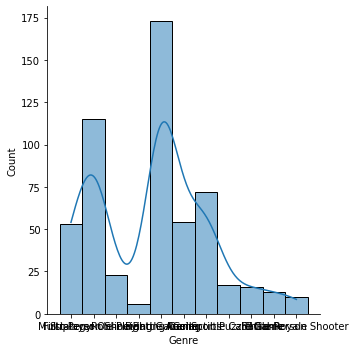

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df['Genre'],kde=True);

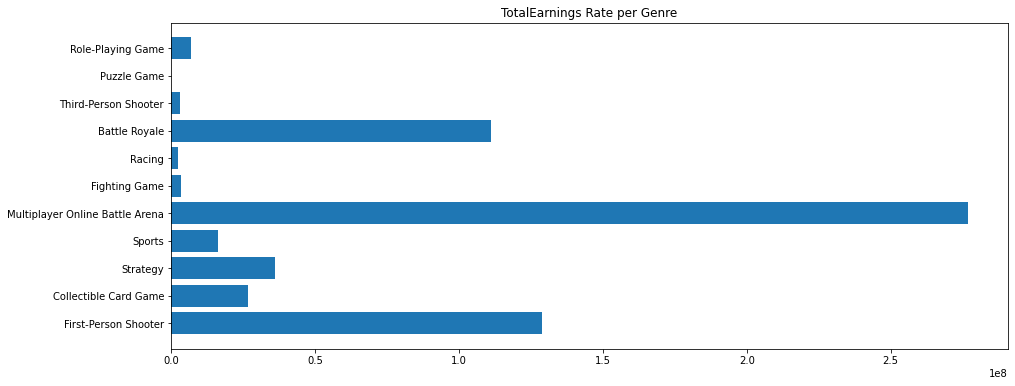

In [211]:
sns_plot_df = df.sort_values(by='TotalEarnings')
plt.figure(figsize=(15,6))
plt.title(f'TotalEarnings Rate per Genre')
plt.barh(sns_plot_df['Genre'], sns_plot_df['TotalEarnings']);

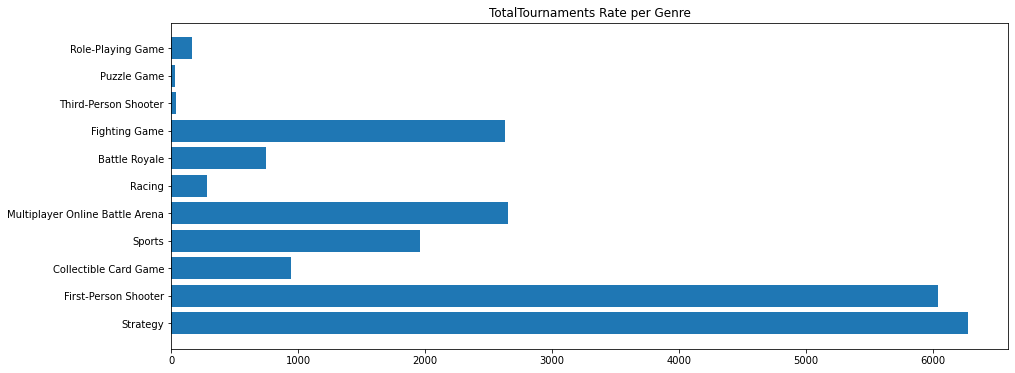

In [217]:
sns_plot_df = df.sort_values(by='TotalTournaments')
plt.figure(figsize=(15,6))
plt.title(f'TotalTournaments Rate per Genre')
plt.barh(sns_plot_df['Genre'], sns_plot_df['TotalTournaments']);

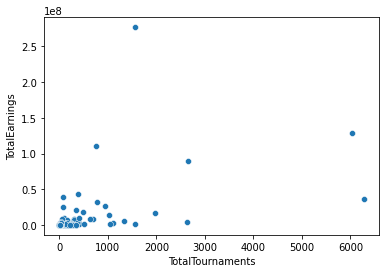

In [218]:
sns.scatterplot(x='TotalTournaments',y='TotalEarnings', data=df)

In [223]:
df.isna().sum().sort_values()

Game                0
ReleaseDate         0
Genre               0
TotalEarnings       0
OnlineEarnings      0
TotalPlayers        0
TotalTournaments    0
dtype: int64

In [ ]:
# EDA 끝

In [ ]:
pip install --upgrade category_encoders

In [193]:
from category_encoders import OneHotEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# (참고) warning 제거를 위한 코드
np.seterr(divide='ignore', invalid='ignore')

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    SelectKBest(f_regression, k=20),
    Ridge(alpha=1.0)
)

# 3-fold 교차검증을 수행합니다.
k = 3
scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE ({k} folds):', -scores)

MAE (3 folds): [75.30900788 16.08601586 14.22003301]


In [194]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 파이프라인을 만들어 봅시다.
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

검증 정확도:  0.5315315315315315


In [198]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        16
           3       1.00      0.88      0.93         8
           4       0.50      1.00      0.67         3
           5       0.38      0.75      0.50         4
           7       0.20      0.50      0.29         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.33      0.33      0.33         3
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         3
          17       0.50      1.00      0.67         1
          18       0.00      0.00      0.00         1
          19       0.00    

In [153]:
from xgboost import XGBClassifier

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train);

In [ ]:
X_train

In [ ]:
pip install shap

In [ ]:
pip install pdpbox

In [86]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

In [ ]:
import sklearn
import xgboost
import shap
from sklearn.model_selection import train_test_split

#X_train = X_train.drop('Game ',axis=1)
X_train = X_train.drop('Genre',axis=1)
shap.initjs();

model = xgboost.XGBRegressor().fit(X_train, y_train)

In [ ]:
X_test

In [ ]:
from xgboost import XGBRegressor

boosting = XGBRegressor(
    n_estimators=1000,
    objective='reg:squarederror',
    learning_rate=0.2,
    n_jobs=-1
)

#X_test.drop('Game',axis=1)
#X_test = X_test.drop('Genre',axis=1)

eval_set = [(X_train, y_train),
            (X_test, y_test)]
boosting.fit(X_train, y_train,
          eval_set=eval_set,
          early_stopping_rounds=50
         )

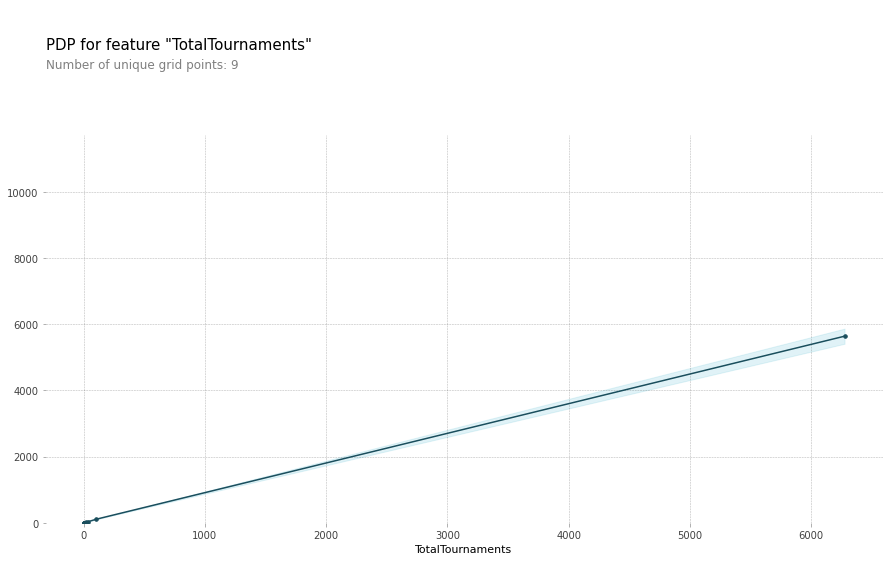

In [271]:
import matplotlib.pyplot as plt
from pdpbox.pdp import pdp_isolate, pdp_plot

from pdpbox import pdp
feature = 'TotalTournaments'
features = X_train.columns
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


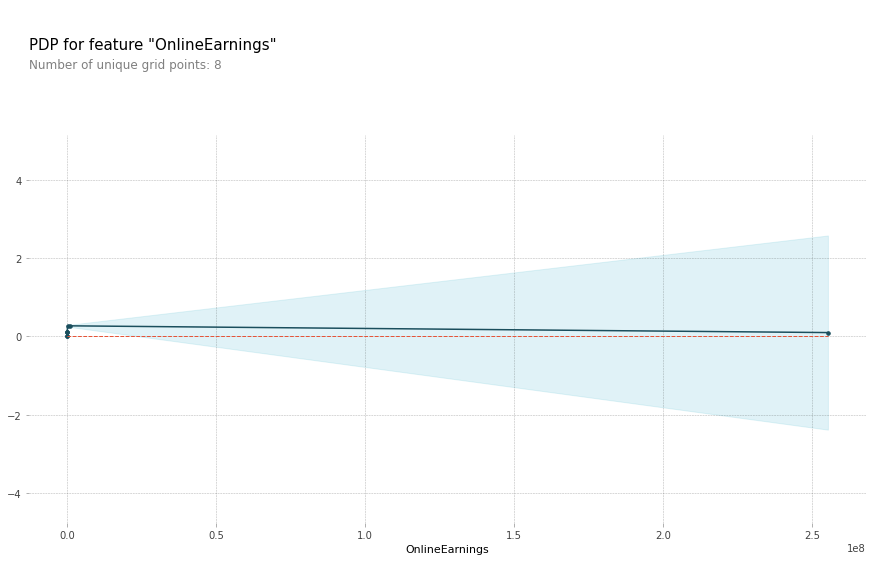

In [267]:
from pdpbox import pdp
feature = 'OnlineEarnings'
features = X_train.columns
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);